In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import ticker

import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert
from pygimli.meshtools import appendTriangleBoundary, merge2Meshes
from pygimli.physics.ert import createERTData, ERTModelling

In [2]:
#We see that after 5 iterations the absolute rms value equals the noise level corresponding to a chi-squared misfit value of 1 as it should be the case for synthetic data.
#The relative rms (in %)

### Data load

In [117]:
data1=ert.load("modele_topo.txt")
data1

Data: Sensors: 82 data: 1357, nonzero entries: ['a', 'b', 'err', 'i', 'm', 'n', 'r', 'u', 'valid']

In [122]:
# data = ert.load("Mesures_Brutes/gradgps.txt")
data.add(ert.load("dipdipgps1.txt"))

# data = ert.load("Mesures_Brutes/aa13.txt")

data.add(pg.load("Mesures_Brutes/aa15.txt"))
data.add(pg.load("Mesures_Brutes/aa13.txt"))
# data.add(pg.load("Mesures_Brutes/aa4impair.txt"))
data.add(pg.load("Mesures_Brutes/aa8.txt"))
data.add(pg.load("Mesures_Brutes/aa9.txt")) 
data.add(pg.load("Mesures_Brutes/aa4enterrees.txt")) 
# data

In [123]:
# data.remove(data['b']>55)
# data

In [124]:
# shm = pg.load("Mesures_Brutes/dipdipgps.txt")
# shm.remove(10*(shm['b']-shm['a']) < (shm['m']-shm['a']))
# shm

In [125]:
# shm.save('dipdipgps1.txt')

### Create mesh with topo

(<AxesSubplot:>, None)

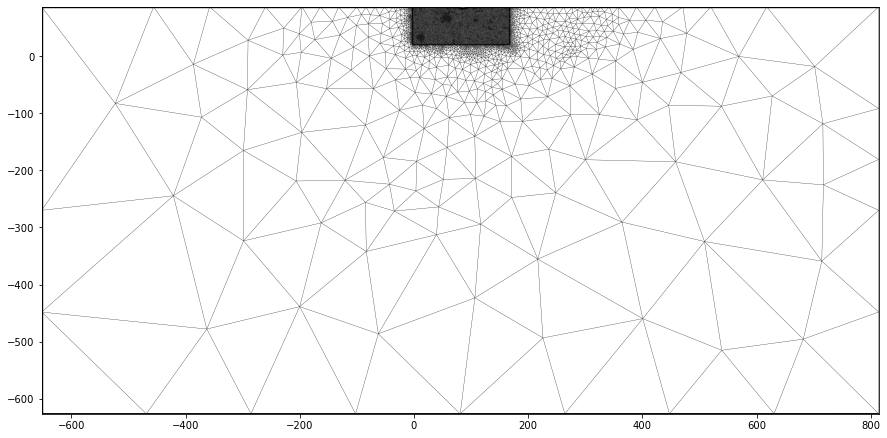

In [126]:
geok=pg.meshtools.createParaMeshPLC(data1,paraMaxCellSize=1)
for p in data.sensors():
    geok.createNode(p)
    geok.createNode(p - [0, 0.1])
meshk = pg.meshtools.createMesh(geok, quality=34)
fig, ax = plt.subplots(figsize=(15, 8))
pg.show(meshk, ax=ax, markers=False)

Mesh: Nodes: 171 Cells: 0 Boundaries: 172

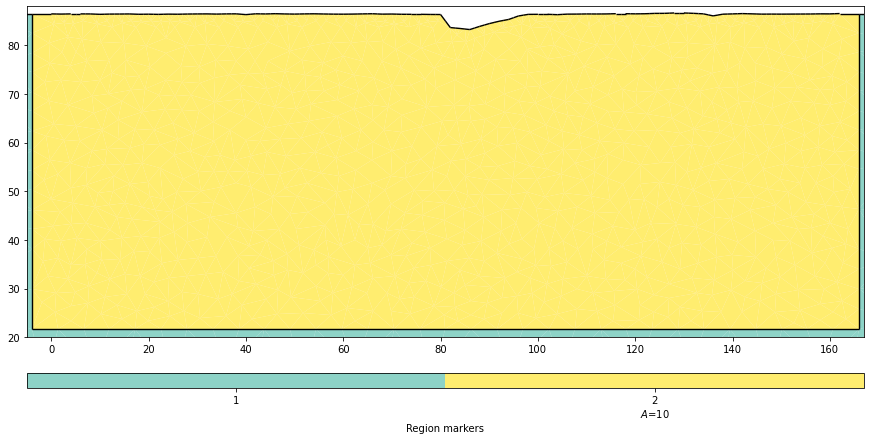

In [127]:
geo=pg.meshtools.createParaMeshPLC(data1,paraMaxCellSize=10)
fig, ax = plt.subplots(figsize=(15, 8))
pg.show(geo, ax=ax, markers=False)
# ax.set_xlim(mgr.paraDomain.xmin(), mgr.paraDomain.xmax())
# ax.set_ylim(mgr.paraDomain.ymin(), mgr.paraDomain.ymax())
ax.set_xlim(-5,167)
ax.set_ylim(20,88)
geo

(20.0, 88.0)

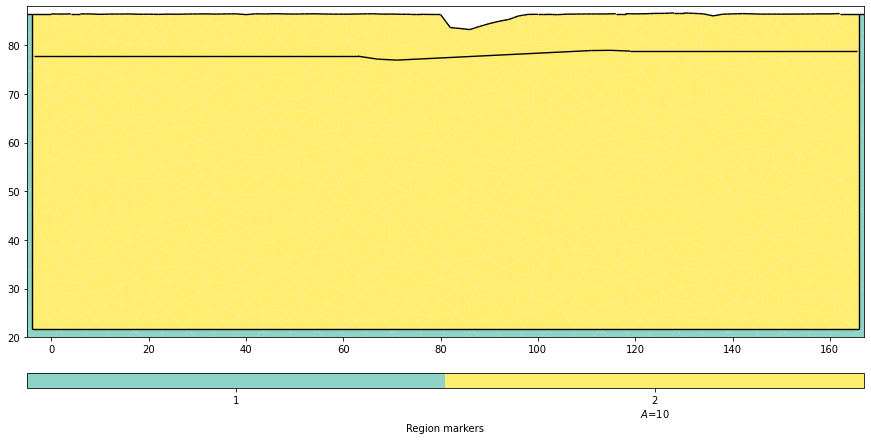

In [128]:
# 63	0	77.79
# 67	0	77.19
# 71	0	76.98
# 111	0	78.95
# 115	0	78.99
# 119	0	78.83
line = mt.createPolygon([(-3.5,77.79), (63,77.79), (67,77.19), (71,76.98), (111,78.95), (115,78.99), (119,78.83), (165.5,78.83)], isClosed=False, interpolate='linear', marker=5) #pour montrer qu'il y a un contraste atttendu ! ca stoppe le lissage des données entre les cellules grâce à cette nouvelle frontière
geo += line
fig, ax = plt.subplots(figsize=(15, 8))
pg.show(geo, ax=ax, markers=False)
ax.set_xlim(-5,167)
ax.set_ylim(20,88)

In [129]:
# for p in data1.sensors():
#     geo.createNode(p)
#     geo.createNode(p - [0,0.1])
geo

Mesh: Nodes: 179 Cells: 0 Boundaries: 179

(20.0, 88.0)

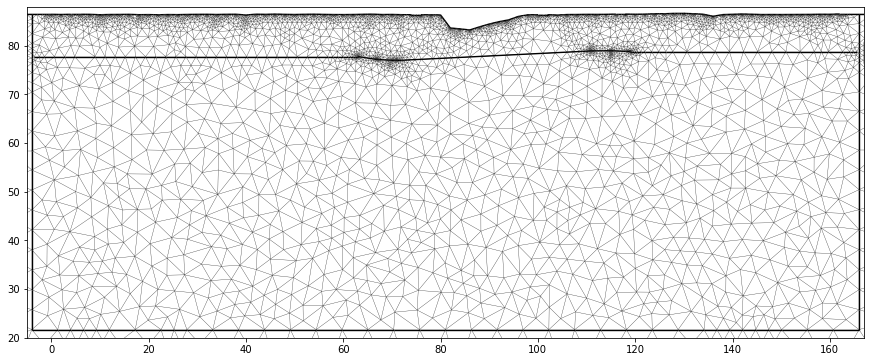

In [130]:
for p in data.sensors():
    geo.createNode(p)
    geo.createNode(p - [0, 0.1])
mesh = pg.meshtools.createMesh(geo, quality=33)

fig, ax = plt.subplots(figsize=(15, 8))
pg.show(mesh, ax=ax, markers=False)
ax.set_xlim(-5,167)
ax.set_ylim(20,88)
# ax.set_xlim(mgr.paraDomain.xmin(), mgr.paraDomain.xmax())
# ax.set_ylim(mgr.paraDomain.ymin(), mgr.paraDomain.ymax())

### Filters

In [131]:
data.remove(data['u'] == 0)
# #data.remove(np.abs(data['u']) < 0.001)
data.remove(data['i'] == 0)
# datak.remove(datak['u'] == 0)
# # #data.remove(np.abs(data['u']) < 0.001)
# datak.remove(datak['i'] == 0)
data

Data: Sensors: 88 data: 2631, nonzero entries: ['a', 'b', 'err', 'i', 'm', 'n', 'r', 'u', 'valid']

In [132]:
pg.info('Data noise %(min/max)', min(data['err'])*100, max(data['err'])*100), data

14/06/22 - 04:20:53 - pyGIMLi - INFO - Data noise %(min/max) 0.0 97879.0


(None,
 Data: Sensors: 88 data: 2631, nonzero entries: ['a', 'b', 'err', 'i', 'm', 'n', 'r', 'u', 'valid'])

In [133]:
data.remove(data['err'] > 10)

Data: Sensors: 88 data: 2491, nonzero entries: ['a', 'b', 'err', 'i', 'm', 'n', 'r', 'u', 'valid']

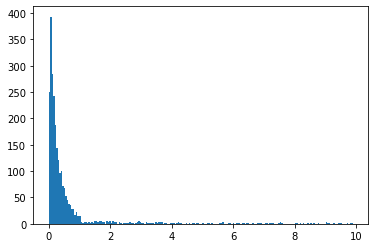

In [134]:
plt.hist(data['err'], bins=200); data

In [135]:
# data['err'] = ert.estimateError(data, absoluteUError=1e-6, relativeError=0.03) #50microV et 3%  1microV 0.2%

### Create k + rhoa

In [136]:
data['r'] = data['u']/data['i']
data

Data: Sensors: 88 data: 2491, nonzero entries: ['a', 'b', 'err', 'i', 'm', 'n', 'r', 'u', 'valid']

In [137]:
hom = ert.simulate(meshk, res=1.0, scheme=data, sr=False,
                   calcOnly=True, verbose=True)
#hom['k'] = ert.createGeometricFactors(data, numerical=True) #calculate k numerically = foward simulation on a homogeneous model with a fine mesh and accounting for this topography https://www.youtube.com/watch?v=w3pu0H3dXe8


hom.save('homogeneous.ohm', 'a b m n u')
#k')

1

In [138]:
data.set('k', 1.0/ (hom('u') / hom('i')))
data.set('rhoa', data('k') * data('u') / data('i'))
data['err'] = ert.estimateError(data, absoluteUError=5e-5, relativeError=0.03) #50microV et 3%

data.save('test.dat', 'a b m n rhoa k u i err')

# np.testing.assert_approx_equal(het('rhoa')[0], 9.5, 1)

1

In [139]:
# data['k'] = ert.createGeometricFactors(datak, numerical=True) #calculate k numerically = foward simulation on a homogeneous model with a fine mesh and accounting for this topography https://www.youtube.com/watch?v=w3pu0H3dXe8
# data, datak

In [140]:
a=np.count_nonzero(data['rhoa'])
a

2491

In [141]:
pg.info('rhoa<0', 100*(np.count_nonzero(data['rhoa']<0)/a))
pg.info('err>5', 100*(np.count_nonzero(data['err']>0.05)/a))
pg.info('k>5000', 100*(np.count_nonzero(abs(data['k'])>5000)/a))

14/06/22 - 04:21:20 - pyGIMLi - INFO - rhoa<0 5.41951023685267
14/06/22 - 04:21:20 - pyGIMLi - INFO - err>5 0.0
14/06/22 - 04:21:20 - pyGIMLi - INFO - k>5000 8.912083500602169


In [142]:
data.remove(data['rhoa'] <0)
mgr = ert.ERTManager(sr=False)
mgr.checkData(data)
print(data)

Data: Sensors: 88 data: 2356, nonzero entries: ['a', 'b', 'err', 'i', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']


Data: Sensors: 88 data: 2356, nonzero entries: ['a', 'b', 'err', 'i', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']

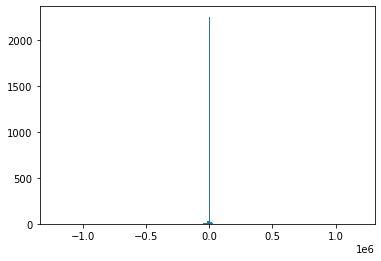

In [143]:
plt.hist(data['k'], bins=200); data

In [144]:
data.remove(abs(data['k']) >5000)

In [145]:
pg.info('Data', data)
pg.info('The data contains:', data.dataMap().keys())

pg.info('Rhoa (min/max)', min(data['rhoa']), max(data['rhoa']))
pg.info('Selected data noise %(min/max)', min(data['err'])*100, max(data['err'])*100)
data.save('test.dat')

14/06/22 - 04:21:28 - pyGIMLi - INFO - Data Data: Sensors: 88 data: 2290, nonzero entries: ['a', 'b', 'err', 'i', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']
14/06/22 - 04:21:28 - pyGIMLi - INFO - The data contains: ['a', 'b', 'err', 'i', 'ip', 'iperr', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']
14/06/22 - 04:21:28 - pyGIMLi - INFO - Rhoa (min/max) 0.7247575534567179 777.3463378440766
14/06/22 - 04:21:28 - pyGIMLi - INFO - Selected data noise %(min/max) 3.0000022405609648 3.1724137931034484


1

Data: Sensors: 88 data: 2290, nonzero entries: ['a', 'b', 'err', 'i', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']

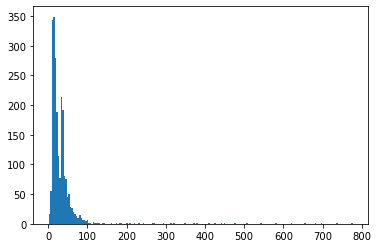

In [146]:
plt.hist(data['rhoa'], bins=200); data

### Outliers en rhoa

In [147]:
# data.remove(data['rhoa']==min(data['rhoa']))
# data

In [148]:
# data.remove(data['rhoa'] > 700)
data.remove(data['rhoa'] < 2)   
data

Data: Sensors: 88 data: 2288, nonzero entries: ['a', 'b', 'err', 'i', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']

Data: Sensors: 88 data: 2288, nonzero entries: ['a', 'b', 'err', 'i', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']

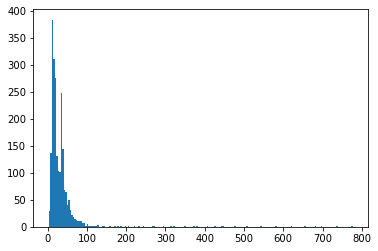

In [149]:
plt.hist(data['rhoa'], bins=200); data

In [150]:
pg.info('Data', data)
pg.info('The data contains:', data.dataMap().keys())

pg.info('Rhoa (min/max)', min(data['rhoa']), max(data['rhoa']))
pg.info('Selected data noise %(min/max)', min(data['err'])*100, max(data['err'])*100)
data.save('test.dat')

14/06/22 - 04:21:31 - pyGIMLi - INFO - Data Data: Sensors: 88 data: 2288, nonzero entries: ['a', 'b', 'err', 'i', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']
14/06/22 - 04:21:31 - pyGIMLi - INFO - The data contains: ['a', 'b', 'err', 'i', 'ip', 'iperr', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']
14/06/22 - 04:21:31 - pyGIMLi - INFO - Rhoa (min/max) 2.1528818825906035 777.3463378440766
14/06/22 - 04:21:31 - pyGIMLi - INFO - Selected data noise %(min/max) 3.0000022405609648 3.073529411764706


1

In [151]:
pg.info('filtré', (100*(a-np.count_nonzero(data['rhoa']))/a))

14/06/22 - 04:21:31 - pyGIMLi - INFO - filtré 8.149337615415496


### Pseudosection

In [152]:
# fig, ax = plt.subplots(figsize=(30, 15))
# # ax, cb = ert.show(data)  # or any other show command
# # cb.ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
# ert.show(data,ax=ax) #(pseudosection)

In [153]:
# data.remove(data['err']>0.1)
# data

In [154]:
# fig, ax = plt.subplots(figsize=(30, 15))
# ert.show(data, vals=data['err']*100, label='err %', ax=ax)

In [155]:
# data['err'][0]

### Inversion

In [156]:
mod = mgr.invert(data, mesh=mesh ,lam=30, verbose=True, robustData = True)

14/06/22 - 04:21:31 - pyGIMLi - INFO - Found 2 regions.
14/06/22 - 04:21:31 - pyGIMLi - INFO - Region with smallest marker (1) set to background
14/06/22 - 04:21:31 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/06/22 - 04:21:32 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/06/22 - 04:21:33 - pyGIMLi - INFO - Use median(data values)=21.67494128397326
14/06/22 - 04:21:33 - pyGIMLi - INFO - Created startmodel from forward operator: 8217 [21.67494128397326,...,21.67494128397326]
14/06/22 - 04:21:33 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002761CC8B680>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002761CFB54F0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002761CC90F40>
min/max (data): 2.15/777
min/max (error): 3%/3.07%
min/max (start model): 21.67/21.67
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 79.23 (dPhi = 56.15%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 38.56 (dPhi = 27.85%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 16.79 (dPhi = 36.54%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 8.28 (dPhi = 23.86%) lam: 30.0
---------------------------------------------------

In [157]:
pos = {i+1 : np.array(data.sensorPosition(i)) for i in range(data.sensorCount())}
modelP = mgr.paraModel(mod)
loadmesh =mgr.paraDomain
coverage = mgr.coverage()

In [158]:
# loadmesh = pg.load('surf/ERTManager/resistivity-pd.bms')
# modelP = pg.load('surf/ERTManager/resistivity.vector')
# coverage = pg.load('surf/ERTManager/resistivity-cov.vector')

14/06/22 - 04:38:23 - pyGIMLi - INFO - Saving resistivity data to: entsurfline\ERTManager


('entsurfline\\ERTManager', <Figure size 1152x720 with 2 Axes>, <AxesSubplot:>)

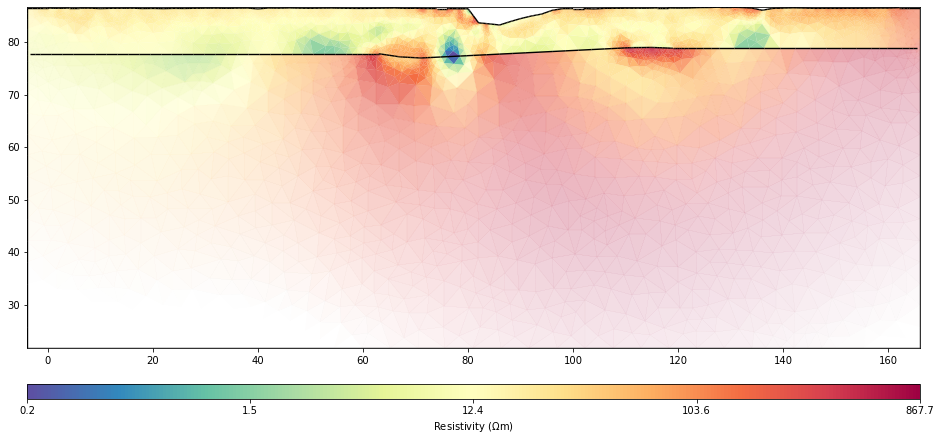

In [159]:
mgr.saveResult('entsurfline')

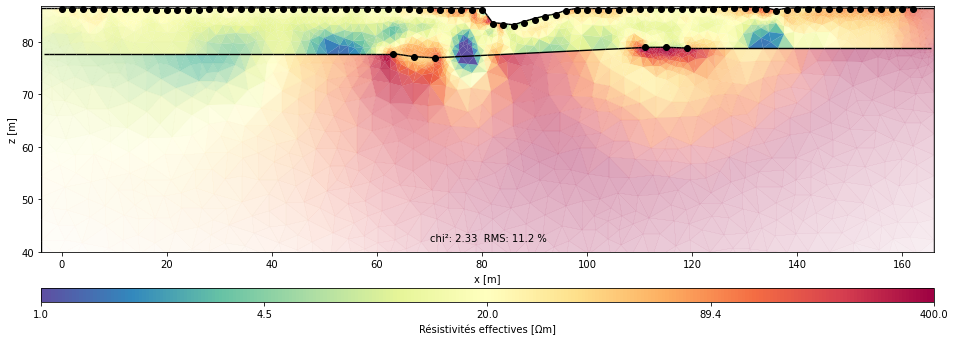

In [162]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot([v[0] for _,v in pos.items()], [v[1] for _,v in pos.items()], 'ok')
ax.annotate(f'chi²: {round(mgr.inv.chi2(),2)}  RMS: {round(mgr.inv.relrms(),2)} %', (70, 42))
pg.show(loadmesh, modelP, ax=ax, cMap='Spectral_r',
        logScale=True,nLevs=5, xlabel='x [m]', ylabel='z [m]', label='Résistivités effectives [Ωm]', coverage=coverage, cMax=400, cMin=1)
ax.set_ylim(40,86.8)
plt.savefig('Tof/entsurfline.pdf', bbox_inches='tight', pad_inches=0.05)

In [161]:
print( f'chi²: {round(mgr.inv.chi2(),2)}')
print( f'RMS: {round(mgr.inv.relrms(),2)}') #Relative root-mean-square misfit

chi²: 26.36
RMS: 17.96


In [434]:
print(f'chi²: {round(mgr.inv.chi2(),2)}')

chi²: 19.79


In [ ]:
mgr.showFit()
# plt.savefig('Tof/10showfit apriori tout sup10 lam30L1.pdf')

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
misfit = pg.log(mgr.inv.response / data["rhoa"]) / data["err"]
pg.show(data, misfit, cMap="bwr", ax=ax, cMin=-3, cMax=3)
# plt.savefig('Tof/11misfit ddgr lam30L1.pdf')

In [ ]:
# data.remove(pg.log(mgr.inv.response / data["rhoa"]) / data["err"] <-3000)
# data

## Sensibilité

In [ ]:
for cell in mesh.cells():
    cell.setMarker(999)
inv_mesh = appendTriangleBoundary(mesh, -100., 100., quality=31, smooth=True,
                              marker=99, isSubSurface=True)

pg.show(inv_mesh, markers=True, showMesh=True)

In [ ]:
fop = ERTModelling()
fop.setData(data)
fop.setMesh(inv_mesh)

model = np.ones(mesh.cellCount())
fop.createJacobian(model)

In [ ]:
def getABMN(scheme, idx):
    """ Get coordinates of four-point cfg with id `idx` from DataContainerERT
    `scheme`."""
    coords = {}
    for elec in "abmn":
        elec_id = int(scheme(elec)[idx])
        elec_pos = scheme.sensorPosition(elec_id)
        coords[elec] = elec_pos.x(), elec_pos.y()
    return coords

In [ ]:
def plotABMN(ax, scheme, idx):
    """ Visualize four-point configuration on given axes. """
    coords = getABMN(scheme, idx)
    for elec in coords:
        x, y = coords[elec]
        if elec in "ab":
            color = "red"
        else:
            color = "blue"
        ax.plot(x, y, marker=".", color=color, ms=10)
        ax.annotate(elec.upper(), xy=(x, y), size=12, ha="right", va='top', bbox=dict(boxstyle="round", fc=(0.8, 0.8, 0.8), ec=color), xytext=(0, 20),
                    textcoords='offset points', arrowprops=dict(arrowstyle="wedge, tail_width=.5", fc=color, ec=color, patchA=None, alpha=0.75))
        ax.plot(coords["a"][0],)

In [ ]:
fig, ax = plt.subplots()
ax.set_ylim(-25, 0)
plotABMN(ax, data, 0)

In [ ]:
sensitivity = [(i[0], np.array(i[1])) for i in enumerate(fop.jacobian())]

In [ ]:
max_max = np.max(np.abs(np.array([sensitivity[i][1] for i in range(len(sensitivity))])))
max_max

In [ ]:
pos = {i+1 : np.array(data.sensorPosition(i)) for i in range(data.sensorCount())}

In [ ]:
i = 431 # look at the sensitivity of one array commence à 0 !!
fig, ax = plt.subplots(figsize=(16, 8))
#
ax.plot([v[0] for _,v in pos.items()], [v[1] for _,v in pos.items()], 'ok')
# Electrode annotations
plotABMN(ax, data, i)
# Log-scaled and normalized sensitivity
# normsens = pg.utils.logDropTol(sensitivity[i][1]/mesh.cellSizes(), 8e-4)
# normsens /= max_max
# pg.show(mesh, normsens, cMap="RdGy_r", ax=ax, orientation="vertical",
#          label="Normalized\nsensitivity", nLevs=3, cMin=-1, cMax=1)
# ax.set_ylim(-25, 0)
#sensitivity
normsens = 100*pg.utils.logDropTol(sensitivity[i][1]/mesh.cellSizes(), 8e-4)
pg.show(mesh, normsens, cMap="jet", ax=ax, orientation="vertical",
             label="Sensitivity x 100")
ax.set_ylim(-25, 0)

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))

totsens = pg.core.RVector(np.zeros(mesh.cellCount()))

for i in sensitivity:

    # Log-scaled and normalized sensitivity
    normsens = pg.utils.logDropTol(i[1]/mesh.cellSizes(), 8e-4)
    totsens += np.abs(normsens)
totsens /= np.max(np.abs(totsens))
pg.show(mesh, totsens, cMap="hot_r", ax=ax, orientation="horizontal",
        label="Normalized\nabsolute sensitivity", nLevs=3, cMin=0, cMax=1)
ax.plot([v[0] for _,v in pos.items()], [v[1] for _,v in pos.items()], 'ok')

In [ ]:
from matplotlib import animation
from IPython.display import HTML
def animate(i):
    ax.clear()
    ax.plot([v[0] for _,v in pos.items()], [v[1] for _,v in pos.items()], 'ok')
    # Electrode annotations
    plotABMN(ax, data, i)

    # Log-scaled and normalized sensitivity
    normsens = pg.utils.logDropTol(sensitivity[i][1]/mesh.cellSizes(), 8e-4)
    ####normsens /= np.max(np.abs(normsens))
    normsens /= max_max
    pg.show(mesh, normsens, cMap="RdGy_r", ax=ax, orientation="vertical",
            label="Normalized\nsensitivity", nLevs=3, cMin=-1, cMax=1)
    ax.set_ylim(-25, 0)
    ax.text(-4,-10,f'array: {i:d}')
    # ax.text(-4,-15,f'normsens: {np.max(np.abs(normsens)):.3f}')
    # ax.text(-4,-20,f'max_max: {max_max:.3f}')
    # #sensitivity
    # normsens = 100*pg.utils.logDropTol(sensitivity[i][1]/mesh.cellSizes(), 8e-4)
    # pg.show(mesh, normsens, cMap="jet", ax=ax, orientation="vertical",
    #        label="Sensitivity x 100")
    # ax.text(-4,-10,f'array: {i:d}')
    # ax.set_ylim(-25, 0)

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
anim = animation.FuncAnimation(fig, animate,
                               frames=len(sensitivity), interval=500, 
                               blit=False)
anim.save('./seq13total.mp4')